# 시카고 범죄율을 예측해 보자 ( Facebook 의 Prophet 라이브러리 활용 )





# STEP #0: PROBLEM STATEMENT

- The Chicago Crime dataset : 2001 ~ 2017. 
- Datasource: 캐글 https://www.kaggle.com/currie32/crimes-in-*chicago*
- Dataset contains the following columns: 
    - ID: Unique identifier for the record.
    - Case Number: The Chicago Police Department RD Number (Records Division Number), which is unique to the incident.
    - Date: Date when the incident occurred.
    - Block: address where the incident occurred
    - IUCR: The Illinois Unifrom Crime Reporting code.
    - Primary Type: The primary description of the IUCR code.
    - Description: The secondary description of the IUCR code, a subcategory of the primary description.
    - Location Description: Description of the location where the incident occurred.
    - Arrest: Indicates whether an arrest was made.
    - Domestic: Indicates whether the incident was domestic-related as defined by the Illinois Domestic Violence Act.
    - Beat: Indicates the beat where the incident occurred. A beat is the smallest police geographic area – each beat has a dedicated police beat car. 
    - District: Indicates the police district where the incident occurred. 
    - Ward: The ward (City Council district) where the incident occurred. 
    - Community Area: Indicates the community area where the incident occurred. Chicago has 77 community areas. 
    - FBI Code: Indicates the crime classification as outlined in the FBI's National Incident-Based Reporting System (NIBRS). 
    - X Coordinate: The x coordinate of the location where the incident occurred in State Plane Illinois East NAD 1983 projection. 
    - Y Coordinate: The y coordinate of the location where the incident occurred in State Plane Illinois East NAD 1983 projection. 
    - Year: Year the incident occurred.
    - Updated On: Date and time the record was last updated.
    - Latitude: The latitude of the location where the incident occurred. This location is shifted from the actual location for partial redaction but falls on the same block.
    - Longitude: The longitude of the location where the incident occurred. This location is shifted from the actual location for partial redaction but falls on the same block.
    - Location: The location where the incident occurred in a format that allows for creation of maps and other geographic operations on this data portal. This location is shifted from the actual location for partial redaction but falls on the same block.


### 페이스북에서 만든 오픈소스 Prophet 라이브러리

- Seasonal time series data를 분석할 수 있는 딥러닝 라이브러리다. 

- 프로펫 공식 레이지 : https://research.fb.com/prophet-forecasting-at-scale/
https://facebook.github.io/prophet/docs/quick_start.html#python-api


### 코랩에는 자동으로 prophet이 설치되어 있다. 따라서 다른 환경에서 설치 되어있지 않다면, 다음처럼 설치하면 된다.

- pip install fbprophet
     
- 위의 pip 설치 시 에러가 나면 다음처럼 설치해 준다 : 
    conda install -c conda-forge fbprophet


# STEP #1: IMPORTING DATA

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import random
import seaborn as sns
from fbprophet import Prophet


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Chicago_Crimes_2005_to_2007.csv 
# Chicago_Crimes_2008_to_2011.csv
# Chicago_Crimes_2012_to_2017.csv 파일을 읽되, 
# 각각 파라미터 error_bad_lines=False 추가 해준다.


In [ ]:
chicago_df_1 =  
chicago_df_2 =  
chicago_df_3 =  

In [ ]:
# 데이터 모양을 보고, 이상한 부분은 처리해 준다.


In [ ]:
# 위의 3개 데이터프레임을 하나로 합친다. 

chicago_df =  


# STEP #2: EXPLORING THE DATASET  

In [ ]:
# Let's view the head of the training dataset


In [ ]:
# Let's view the last elements in the training dataset


### 비어있는 데이터가 얼마나 되는지 확인하시오.

### 다음 컬럼들을 삭제하시오.

'Case Number', 'Case Number', 'IUCR', 'X Coordinate', 'Y Coordinate','Updated On','Year', 'FBI Code', 'Beat','Ward','Community Area', 'Location', 'District', 'Latitude' , 'Longitude'

### Date 컬럼을 보니, 날짜 형식으로 되어있다. 이를 파이썬이 이해할 수 있는 날짜로 바꿔서 다시 Date 컬럼에 저장하시오. 

### Date 컬럼을 인덱스로 만드시오.

In [ ]:

chicago_df.index = 

### 범죄 유형의 갯수를 세고, 가장 많은것부터 내림차순으로 보여주세요.  

### 상위 15개까지만 보여주세요.

### 상위 15개의 범죄 유형(Primary Type)의 갯수를, 비주얼라리징 하시오. 

### 어디에서 가장 범죄가 많이 발생했는지, 범죄 장소(Location Descripton) 로 비주얼라이징 하시오.

### 데이터를 주기별로 분석해 보자

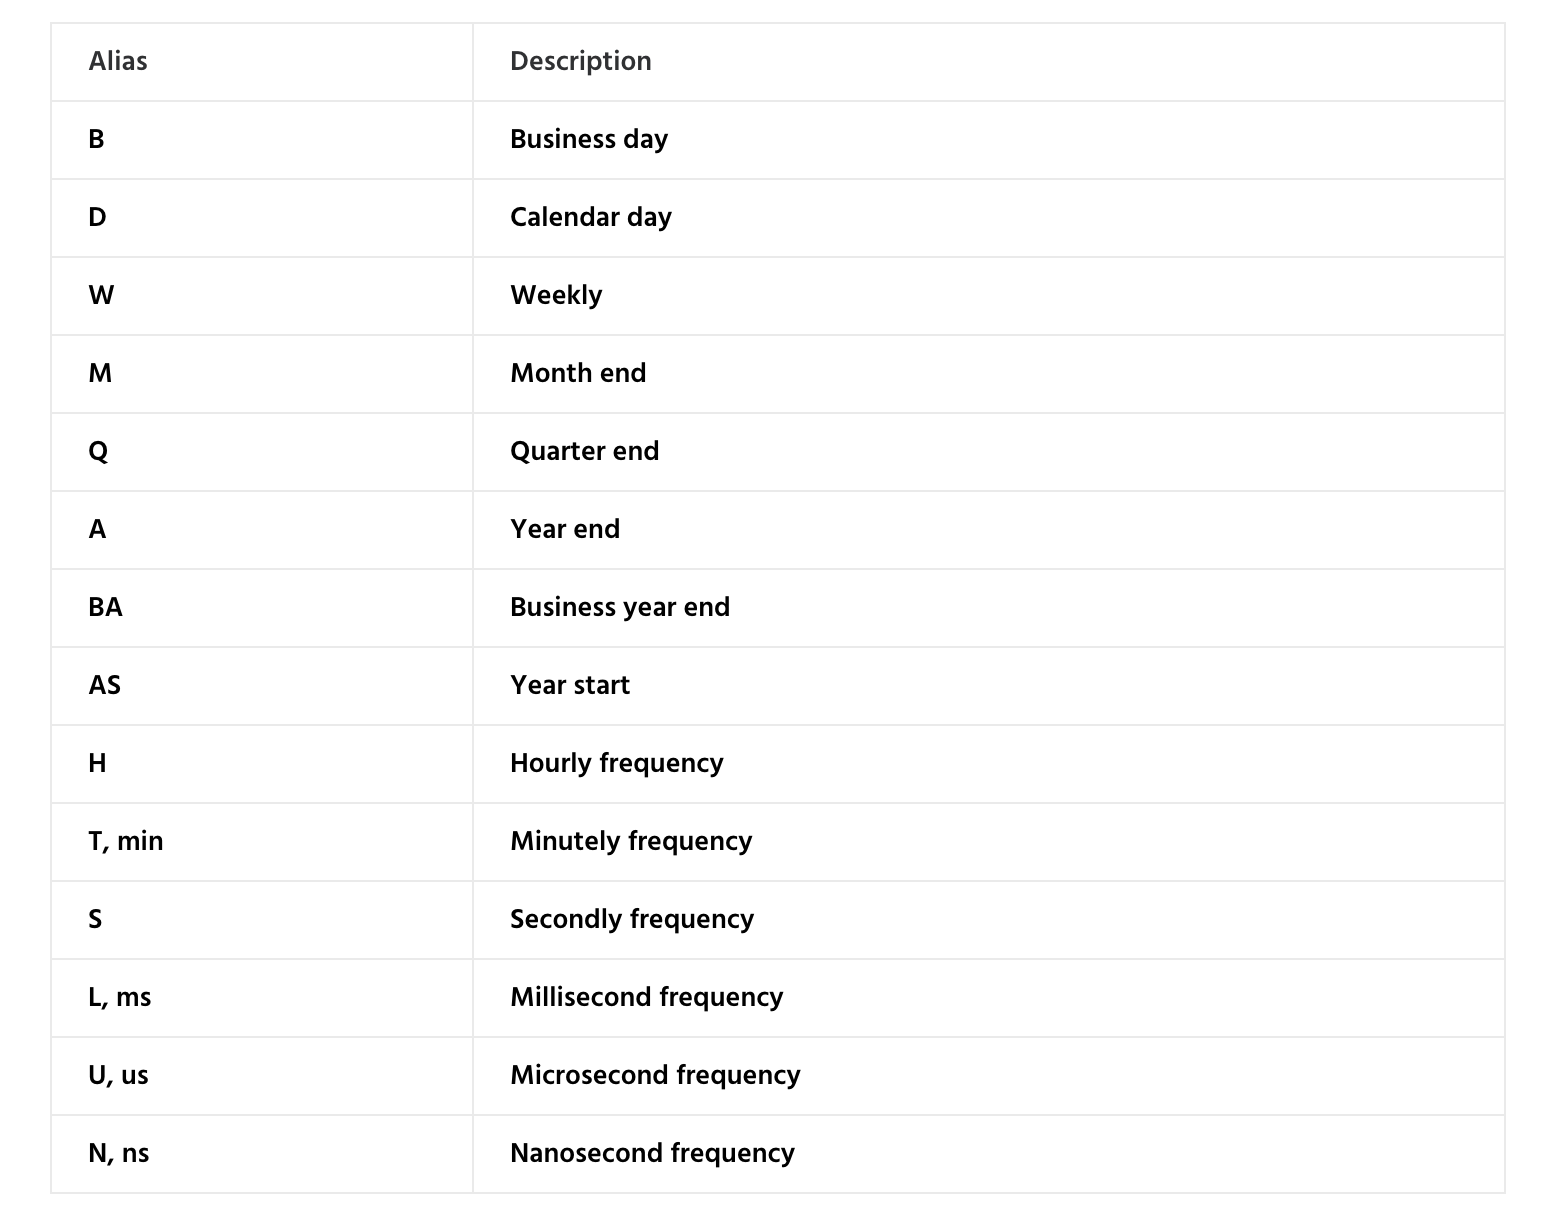

In [ ]:
# resample  'Y' 는 년도다. 년도로 리샘플한 후, 각 년도별 몇개의 범죄 데이터를 가지고 있는지 확인한다.




In [ ]:
# 위의 데이터를 plot 으로 시각화 한다. 범죄횟수를 눈으로 확인하자.


In [ ]:
# 월별 범죄 발생 건수를 확인하자.


In [ ]:
# 월별 범죄 발생 건수도 plot 으로 시각화 하자.


In [ ]:
# 분기별 범죄 건수도 확인하자.


In [ ]:
# 분기별 범죄 건수도 시각화 하자.


# STEP #3: 데이터 준비

### 원별로(매달 말일) 주기로 하여 데이터프레임을 만들고, 인덱스를 리셋하시오.

In [ ]:
chicago_prophet =  

### 프로펫 라이브러리를 사용하려면, 날짜 컬럼은 'ds' 로, 에측하려는 수치는 'y'로 바꿔야 합니다(필수).

# STEP #4: Prophet 으로 예측하기

### [freq 조절 가능한 문자 ](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#timeseries-offset-aliases)

[페이스북 프로펫 페이지 예시](https://facebook.github.io/prophet/docs/non-daily_data.html)

In [ ]:
# 36개월로 해서 예측해보자.
